In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio

In [2]:
data = scio.loadmat('digit.mat')
X = data['X']
T = data['T']
[d,m,c] = T.shape

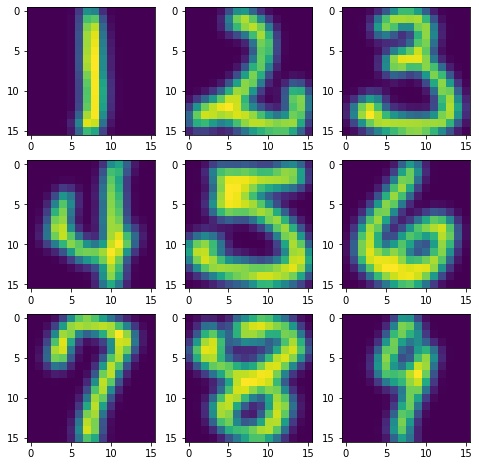

In [3]:
plt.figure(figsize=(8,8))
ax1 = plt.subplot(3, 3, 1)
plt.imshow(X[:,0,0].reshape(16,16))
ax2 = plt.subplot(3, 3, 2)
plt.imshow(X[:,0,1].reshape(16,16))
ax3 = plt.subplot(3, 3, 3)
plt.imshow(X[:,0,2].reshape(16,16))
ax4 = plt.subplot(3, 3, 4)
plt.imshow(X[:,0,3].reshape(16,16))
ax5 = plt.subplot(3, 3, 5)
plt.imshow(X[:,0,4].reshape(16,16))
ax6 = plt.subplot(3, 3, 6)
plt.imshow(X[:,0,5].reshape(16,16))
ax7 = plt.subplot(3, 3, 7)
plt.imshow(X[:,0,6].reshape(16,16))
ax8 = plt.subplot(3, 3, 8)
plt.imshow(X[:,0,7].reshape(16,16))
ax9 = plt.subplot(3, 3, 9)
plt.imshow(X[:,0,8].reshape(16,16))

\begin{equation}
\hat{\mu}_{\mathrm{ML}}=\frac{1}{n} \sum_{i=1}^{n} x_{i}, \quad \hat{\Sigma}_{\mathrm{ML}}=\frac{1}{n} \sum_{i=1}^{n}\left(x_{i}-\hat{\mu}_{\mathrm{ML}}\right)\left(x_{i}-\hat{\mu}_{\mathrm{ML}}\right)^{\top}
\end{equation}

In [4]:
# 极大似然估计均值和方差
mu = np.zeros((d,c))
S = np.zeros((d,d))
for i in range(c):
    mu[:,i] = np.mean(X[:,:,i],1)
    S+=np.cov(X[:,:,i])/c
h = np.dot(np.linalg.inv(S),mu)

\begin{aligned}
\log \hat{p}(y \mid x)=& \boldsymbol{x}^{\mathrm{T}} \hat{\mathbf{\Sigma}}^{-1} \hat{\boldsymbol{\mu}}_{\mathrm{y}}-\frac{1}{2} \hat{\boldsymbol{\mu}}_{\mathrm{y}}^{\mathrm{T}} \hat{\mathbf{\Sigma}}^{-1} \hat{\mu}_{\mathrm{y}}+\log \frac{n_{y}}{n}+C^{\prime}
\end{aligned}

In [5]:
# 计算类后验概率
p = np.zeros((c,m,c))
for k in range(c):
    p[:,:,k]=np.dot(h.T,T[:,:,k])-np.tile(sum(np.multiply(mu,h)).reshape(c,1),(1,m))/2

\begin{equation}
\operatorname{sign}(x)=\left\{\begin{array}{ll}
1, & x>0 \\
0, & x=0 \\
-1, & x<0
\end{array}\right.
\end{equation}

\begin{equation}
\hat{y}=\underset{y}{\arg \max } p(y \mid x)
\end{equation}

In [6]:
# 最大后验概率规则
P = p.argmax(axis=0)

In [7]:
# 计算混淆矩阵
C = np.zeros((c,c))
for i in range(c):
    for j in range(c):
        C[i,j] = np.sum(P[:,i]==j)

In [8]:
C

array([[199.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.],
       [  0., 169.,   8.,   8.,   1.,   2.,   4.,   8.,   0.,   0.],
       [  0.,   0., 182.,   1.,   5.,   0.,   2.,   8.,   1.,   1.],
       [  2.,   2.,   0., 182.,   0.,   1.,   0.,   3.,  10.,   0.],
       [  0.,   0.,  21.,   4., 162.,   1.,   0.,   4.,   4.,   4.],
       [  1.,   2.,   0.,   1.,   5., 185.,   0.,   3.,   0.,   3.],
       [  2.,   0.,   1.,   5.,   1.,   0., 181.,   0.,   9.,   1.],
       [  0.,   1.,  16.,   6.,   6.,   0.,   1., 164.,   3.,   3.],
       [  1.,   0.,   0.,   8.,   0.,   0.,   7.,   2., 182.,   0.],
       [  0.,   0.,   3.,   0.,   0.,   4.,   0.,   1.,   0., 192.]])

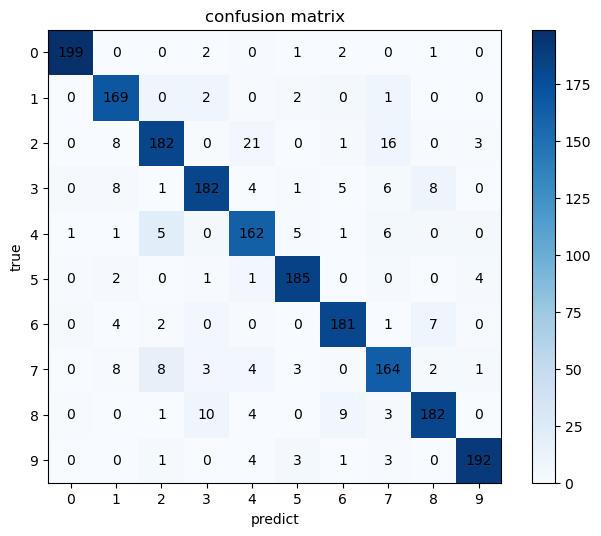

In [9]:
plt.figure(figsize=(8,6),dpi=100)
classes = ['0','1','2','3','4','5','6','7','8','9']
confusion = C.astype('int')
plt.imshow(confusion,  interpolation='nearest',cmap=plt.cm.Blues)
indices = np.arange(len(classes))
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
plt.title('confusion matrix')
plt.xlabel('predict')
plt.ylabel('true')
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],va = 'center',ha = 'center')
plt.show()

In [10]:
print("正确率：",np.trace(C)/2000)

正确率： 0.899
